## __Task 1__

## Importing packages

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score , precision_score , f1_score , recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeClassifier as RC
from sklearn.linear_model import LogisticRegression as LR2
from sklearn.tree import DecisionTreeClassifier as DTC 
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import KFold , train_test_split
from sklearn.metrics import f1_score , accuracy_score , precision_score , recall_score

import warnings
warnings.filterwarnings("ignore")

##Downloading Dataset

In [7]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [10]:
! cp /content/gdrive/MyDrive/kaggle.json ~/.kaggle/

In [11]:
! chmod 600 ~/.kaggle/kaggle.json

In [12]:
! kaggle datasets download iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 47.0MB/s]


In [13]:
! unzip mobile-price-classification.zip 

Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


##Train Data

In [14]:
Data = pd.read_csv('train.csv')
ValidData = pd.read_csv('test.csv')

In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [16]:
Data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Feature Selection : Forward Selection

In [17]:
NewData = Data.copy()
NewData['price_range'].replace(0,'low',inplace = True)
NewData['price_range'].replace(1,'low' , inplace = True)
NewData['price_range'].replace(2,'high', inplace = True)
NewData['price_range'].replace(3,'high', inplace = True)
NewData.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,low
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,high
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,high
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,high
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,low


In [18]:
def modelfit(x,y):
  model = RC()
  model.fit(x,y)
  auc = roc_auc_score(y , model.predict(x))
  return auc

In [19]:
def forwardselection(X,y):
  best_features = []
  Features = list(x.columns)
  A = []
  n_features = len(list(Features))

  while len(Features) > 0: 
    current_features = best_features.copy()
    auc_score_best = 0
    for i , col in enumerate(Features):
      current_features.append(col)
      X = x[current_features].values
      auc_score = modelfit(X,y)
      if auc_score > auc_score_best:
        if col not in best_features: 
          best_features.append(col)
        auc_score_best = auc_score
      else:
        current_features.pop()

      Features.pop(i)
  return best_features


In [20]:
x = NewData.drop(columns = ['price_range'])
y = NewData['price_range'].values
y = OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
Best_features = forwardselection(x,y)
print('Best features are ', Best_features)

Best features are  ['battery_power', 'fc', 'mobile_wt', 'px_width', 'sc_h', 'blue', 'ram', 'three_g', 'dual_sim', 'px_height', 'wifi', 'm_dep', 'sc_w']


## LogRegression Function

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer , StandardScaler
def LogReg(X_train,y_train,X_test, y_test , scaler = 'norm' , r = 3):
  ## Model Generation
  if scaler == 'none':
    model = LogisticRegression()
  elif scaler == 'norm':
    model = Pipeline([['Scaler',Normalizer()],['LR',LogisticRegression()]])
  elif scaler == 'standard':
    model = Pipeline([['Scaler',StandardScaler()],['LR',LogisticRegression()]])

  ## Fit data to model
  model.fit(X_train,y_train)

  ## Predicing output for both train and test sets
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  ## Model Evaluation

  # Train
  print('Train set Evaluation is: ')
  print('\n')
  print('F1-score of Model for selected features is: ' , round(f1_score(y_train,y_pred_train,average = 'macro'),r))
  print('Precision_score of Model for selected features is: ' , round(precision_score(y_train,y_pred_train,average = 'macro'),r))
  print('Recall-score of Model for selected features is: ' , round(recall_score(y_train,y_pred_train,average = 'macro') , r))
  print('\n')

  # Test
  print('Test set Evaluation is: ')
  print('\n')
  print('F1-score of Model for selected features is: ' , round(f1_score(y_test,y_pred_test,average = 'macro'),r))
  print('Precision_score of Model for selected features is: ' , round(precision_score(y_test,y_pred_test,average = 'macro'),r))
  print('Recall-score of Model for selected features is: ' , round(recall_score(y_test,y_pred_test,average = 'macro'),2))


## 2. Logistic Regression on Selected Features with Forward stepwise

In [22]:
X = Data[Best_features].values
y = Data['price_range'].values

X_train , X_test , y_train , y_test = train_test_split(X,y)
LogReg(X_train , y_train ,X_test, y_test , scaler = 'norm')


Train set Evaluation is: 


F1-score of Model for selected features is:  0.513
Precision_score of Model for selected features is:  0.523
Recall-score of Model for selected features is:  0.537


Test set Evaluation is: 


F1-score of Model for selected features is:  0.531
Precision_score of Model for selected features is:  0.544
Recall-score of Model for selected features is:  0.57


## 3. PCA

In [23]:
from sklearn.decomposition import PCA
n_selected_features = len(Best_features)
X = Data.drop(columns = ['price_range']).values
y = Data['price_range'].values
x_train , x_test , y_train , y_test = train_test_split(X,y)

PCA_model = PCA(n_components = n_selected_features)
PCA_X_train = PCA_model.fit_transform(x_train)
PCA_X_test =  PCA_model.transform(x_test)
print(PCA_X_train)

[[ 1.33525724e+03 -5.35292526e+02  3.01226825e+02 ...  1.38265838e+00
  -6.40841853e-01  2.11244816e-01]
 [-2.18156810e+02  6.47791031e+02 -1.40105371e+02 ...  6.60025018e-02
   8.79781098e-02  6.72517906e-01]
 [ 8.80070874e+02  1.58871220e+01  4.80315527e+02 ... -8.60421400e-01
   1.81426690e+00  1.09509127e+00]
 ...
 [-1.12568982e+02  8.73792610e+02 -3.65050284e+02 ...  5.23698776e+00
  -8.45086225e-01  1.03906482e+00]
 [-9.88176363e+02  1.05392628e+03  6.20859504e+02 ... -2.91193957e+00
  -4.54220558e-02 -4.98070635e-01]
 [-1.66314586e+03 -6.19719954e+02 -6.20099082e+02 ... -2.07024942e-01
  -3.29558289e+00  2.53136162e-01]]


## 4. Logistic Regression on Selected Features with PCA

In [24]:
LogReg(PCA_X_train , y_train , PCA_X_test, y_test , scaler = 'norm')

Train set Evaluation is: 


F1-score of Model for selected features is:  0.867
Precision_score of Model for selected features is:  0.872
Recall-score of Model for selected features is:  0.868


Test set Evaluation is: 


F1-score of Model for selected features is:  0.881
Precision_score of Model for selected features is:  0.883
Recall-score of Model for selected features is:  0.88


## 6. Feature Engineering

In [25]:
X = Data.drop(columns = ['price_range']).values
y = Data['price_range'].values
x_train , x_test , y_train , y_test = train_test_split(X,y)

**6.1. Binning Method**

In [26]:
from sklearn.preprocessing import KBinsDiscretizer
Bins = [5,10,15]
for bins in Bins:
  KBD = KBinsDiscretizer(n_bins = bins , encode = 'ordinal')

  X_B_train = KBD.fit_transform(x_train)
  X_B_test = KBD.fit_transform(x_test)
  y_B_train = KBD.fit_transform(y_train.reshape(-1,1))
  y_B_test = KBD.fit_transform(y_test.reshape(-1,1))

  print(f'LogisticRegression Model Evaluation for {bins} Bins' , '\n')
  LogReg(X_B_train , y_B_train , X_B_test , y_B_test ,scaler = 'none')


LogisticRegression Model Evaluation for 5 Bins 

Train set Evaluation is: 


F1-score of Model for selected features is:  0.894
Precision_score of Model for selected features is:  0.894
Recall-score of Model for selected features is:  0.895


Test set Evaluation is: 


F1-score of Model for selected features is:  0.875
Precision_score of Model for selected features is:  0.878
Recall-score of Model for selected features is:  0.88
LogisticRegression Model Evaluation for 10 Bins 

Train set Evaluation is: 


F1-score of Model for selected features is:  0.939
Precision_score of Model for selected features is:  0.938
Recall-score of Model for selected features is:  0.939


Test set Evaluation is: 


F1-score of Model for selected features is:  0.946
Precision_score of Model for selected features is:  0.95
Recall-score of Model for selected features is:  0.94
LogisticRegression Model Evaluation for 15 Bins 

Train set Evaluation is: 


F1-score of Model for selected features is:  0.956
Preci

**6.2. One Hot Encoder**

In [27]:
## Categorical Data
C = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']

X = Data.drop(columns = ['price_range'])
X = pd.get_dummies(X,columns = C).values

y = NewData['price_range'].values

x_train , x_test , y_train , y_test = train_test_split(X,y)
LogReg(x_train , y_train , x_test , y_test ,scaler = 'norm')


Train set Evaluation is: 


F1-score of Model for selected features is:  0.818
Precision_score of Model for selected features is:  0.823
Recall-score of Model for selected features is:  0.818


Test set Evaluation is: 


F1-score of Model for selected features is:  0.802
Precision_score of Model for selected features is:  0.806
Recall-score of Model for selected features is:  0.8


**6.3. Log Transform**

In [28]:
from scipy.stats import kstest
P_value = 0.05 
Non_norm = []
for col in Data.columns:
  if (kstest(Data[col].values ,'norm').pvalue) < 0.05:
    print(f"feature '{col}' doesn't have normal distribution ")
    Non_norm.append(col)
  else:
    print(f"feature '{col}' has normal distribution ")



feature 'battery_power' doesn't have normal distribution 
feature 'blue' doesn't have normal distribution 
feature 'clock_speed' doesn't have normal distribution 
feature 'dual_sim' doesn't have normal distribution 
feature 'fc' doesn't have normal distribution 
feature 'four_g' doesn't have normal distribution 
feature 'int_memory' doesn't have normal distribution 
feature 'm_dep' doesn't have normal distribution 
feature 'mobile_wt' doesn't have normal distribution 
feature 'n_cores' doesn't have normal distribution 
feature 'pc' doesn't have normal distribution 
feature 'px_height' doesn't have normal distribution 
feature 'px_width' doesn't have normal distribution 
feature 'ram' doesn't have normal distribution 
feature 'sc_h' doesn't have normal distribution 
feature 'sc_w' doesn't have normal distribution 
feature 'talk_time' doesn't have normal distribution 
feature 'three_g' doesn't have normal distribution 
feature 'touch_screen' doesn't have normal distribution 
feature 'wif

In [29]:
from sklearn.preprocessing import FunctionTransformer

In [30]:
X_log = FunctionTransformer(np.log1p).fit_transform(X)

x_train , x_test , y_train , y_test = train_test_split(X_log,y)
LogReg(x_train , y_train , x_test , y_test ,scaler = 'norm')


Train set Evaluation is: 


F1-score of Model for selected features is:  0.822
Precision_score of Model for selected features is:  0.833
Recall-score of Model for selected features is:  0.823


Test set Evaluation is: 


F1-score of Model for selected features is:  0.796
Precision_score of Model for selected features is:  0.815
Recall-score of Model for selected features is:  0.8


**6.4. Generating New Feature**

In [31]:
Data_with_new_feature = Data.copy()
Data_with_new_feature['Surface'] = NewData['sc_w'] * NewData['sc_h']
Data_with_new_feature.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Surface
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,51
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,22
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,16


In [32]:
X = Data_with_new_feature.drop(columns = ['price_range']).values
y = Data_with_new_feature['price_range'].values
x_train , x_test , y_train , y_test = train_test_split(X,y)
LogReg(x_train , y_train , x_test , y_test ,scaler = 'norm')


Train set Evaluation is: 


F1-score of Model for selected features is:  0.531
Precision_score of Model for selected features is:  0.533
Recall-score of Model for selected features is:  0.552


Test set Evaluation is: 


F1-score of Model for selected features is:  0.514
Precision_score of Model for selected features is:  0.509
Recall-score of Model for selected features is:  0.53


## 7. All States Implementation

In [33]:
x = Data.drop(columns = ['price_range']).values
y = Data['price_range'].values


**Log Transformation**


In [34]:
X_log = FunctionTransformer(np.log1p).fit_transform(x)

**Binning with 15 bins**

In [35]:
X_B = KBinsDiscretizer(n_bins = bins , encode = 'ordinal').fit_transform(X_log)

**One Hot**

In [36]:
X_hot = OneHotEncoder().fit_transform(X_B).toarray()
y_hot = OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()

**Regression**

In [37]:
from sklearn.multiclass import OneVsRestClassifier 
x_train , x_test , y_train , y_test = train_test_split(X_hot,y_hot)
model = OneVsRestClassifier(LogisticRegression())
model.fit(x_train,y_train)

## Predicing output for both train and test sets
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

## Model Evaluation
r = 2
# Train
print('Train set Evaluation is: ')
print('\n')
print('F1-score of Model for selected features is: ' , round(f1_score(y_train,y_pred_train,average = 'macro'),r))
print('Precision_score of Model for selected features is: ' , round(precision_score(y_train,y_pred_train,average = 'macro'),r))
print('Recall-score of Model for selected features is: ' , round(recall_score(y_train,y_pred_train,average = 'macro') , r))
print('\n')

# Test
print('Test set Evaluation is: ')
print('\n')
print('F1-score of Model for selected features is: ' , round(f1_score(y_test,y_pred_test,average = 'macro'),r))
print('Precision_score of Model for selected features is: ' , round(precision_score(y_test,y_pred_test,average = 'macro'),r))
print('Recall-score of Model for selected features is: ' , round(recall_score(y_test,y_pred_test,average = 'macro'),2))



Train set Evaluation is: 


F1-score of Model for selected features is:  0.84
Precision_score of Model for selected features is:  0.87
Recall-score of Model for selected features is:  0.82


Test set Evaluation is: 


F1-score of Model for selected features is:  0.76
Precision_score of Model for selected features is:  0.78
Recall-score of Model for selected features is:  0.74


## 11. Making a Tree on Dataset

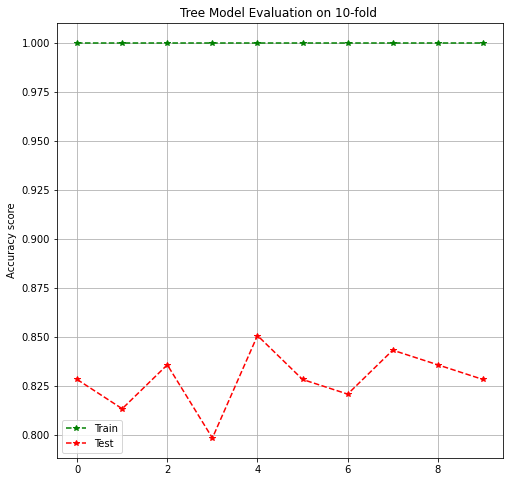

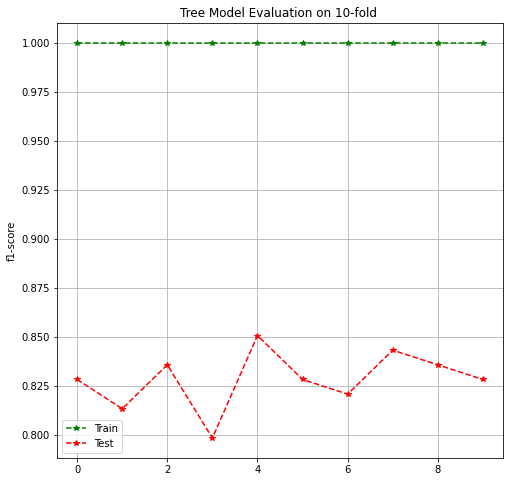

In [38]:

Kfold = KFold(n_splits = 10)
X = Data.drop(columns = ['price_range']).values
Y = Data['price_range'].values
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.33)
TreeModel = Pipeline([('Scaler' , StandardScaler()),
                      ('Tree', DTC())])

Acc_train = []
Acc_test = []

F1_train = []
F1_test = []

for idx_train , idx_test in Kfold.split(X_train):
  TreeModel = TreeModel.fit(X_train[idx_train] , y_train[idx_train])
  y_pred_train = TreeModel.predict(X_train[idx_train])
  Acc_train.append(accuracy_score(y_train[idx_train], y_pred_train ))
  F1_train.append(f1_score(y_train[idx_train], y_pred_train , average = 'micro'))

  y_pred_test = TreeModel.predict(X_train[idx_test])
  Acc_test.append(accuracy_score(y_train[idx_test], y_pred_test))
  F1_test.append(f1_score(y_train[idx_test], y_pred_test , average = 'micro'))

plt.figure(figsize = (8,8))
plt.title('Tree Model Evaluation on 10-fold ')
plt.plot(Acc_train , marker = '*' , linestyle = '--' , color = 'green' , label = 'Train')
plt.plot(Acc_test , marker = '*' , linestyle = '--' , color = 'red' , label = 'Test')
plt.legend()
plt.ylabel('Accuracy score')
plt.grid()
plt.show()


plt.figure(figsize = (8,8))
plt.title('Tree Model Evaluation on 10-fold ')
plt.plot(F1_train , marker = '*' , linestyle = '--' , color = 'green' , label = 'Train')
plt.plot(F1_test , marker = '*' , linestyle = '--' , color = 'red' , label = 'Test')
plt.ylabel('f1-score')
plt.legend()
plt.grid()
plt.show()


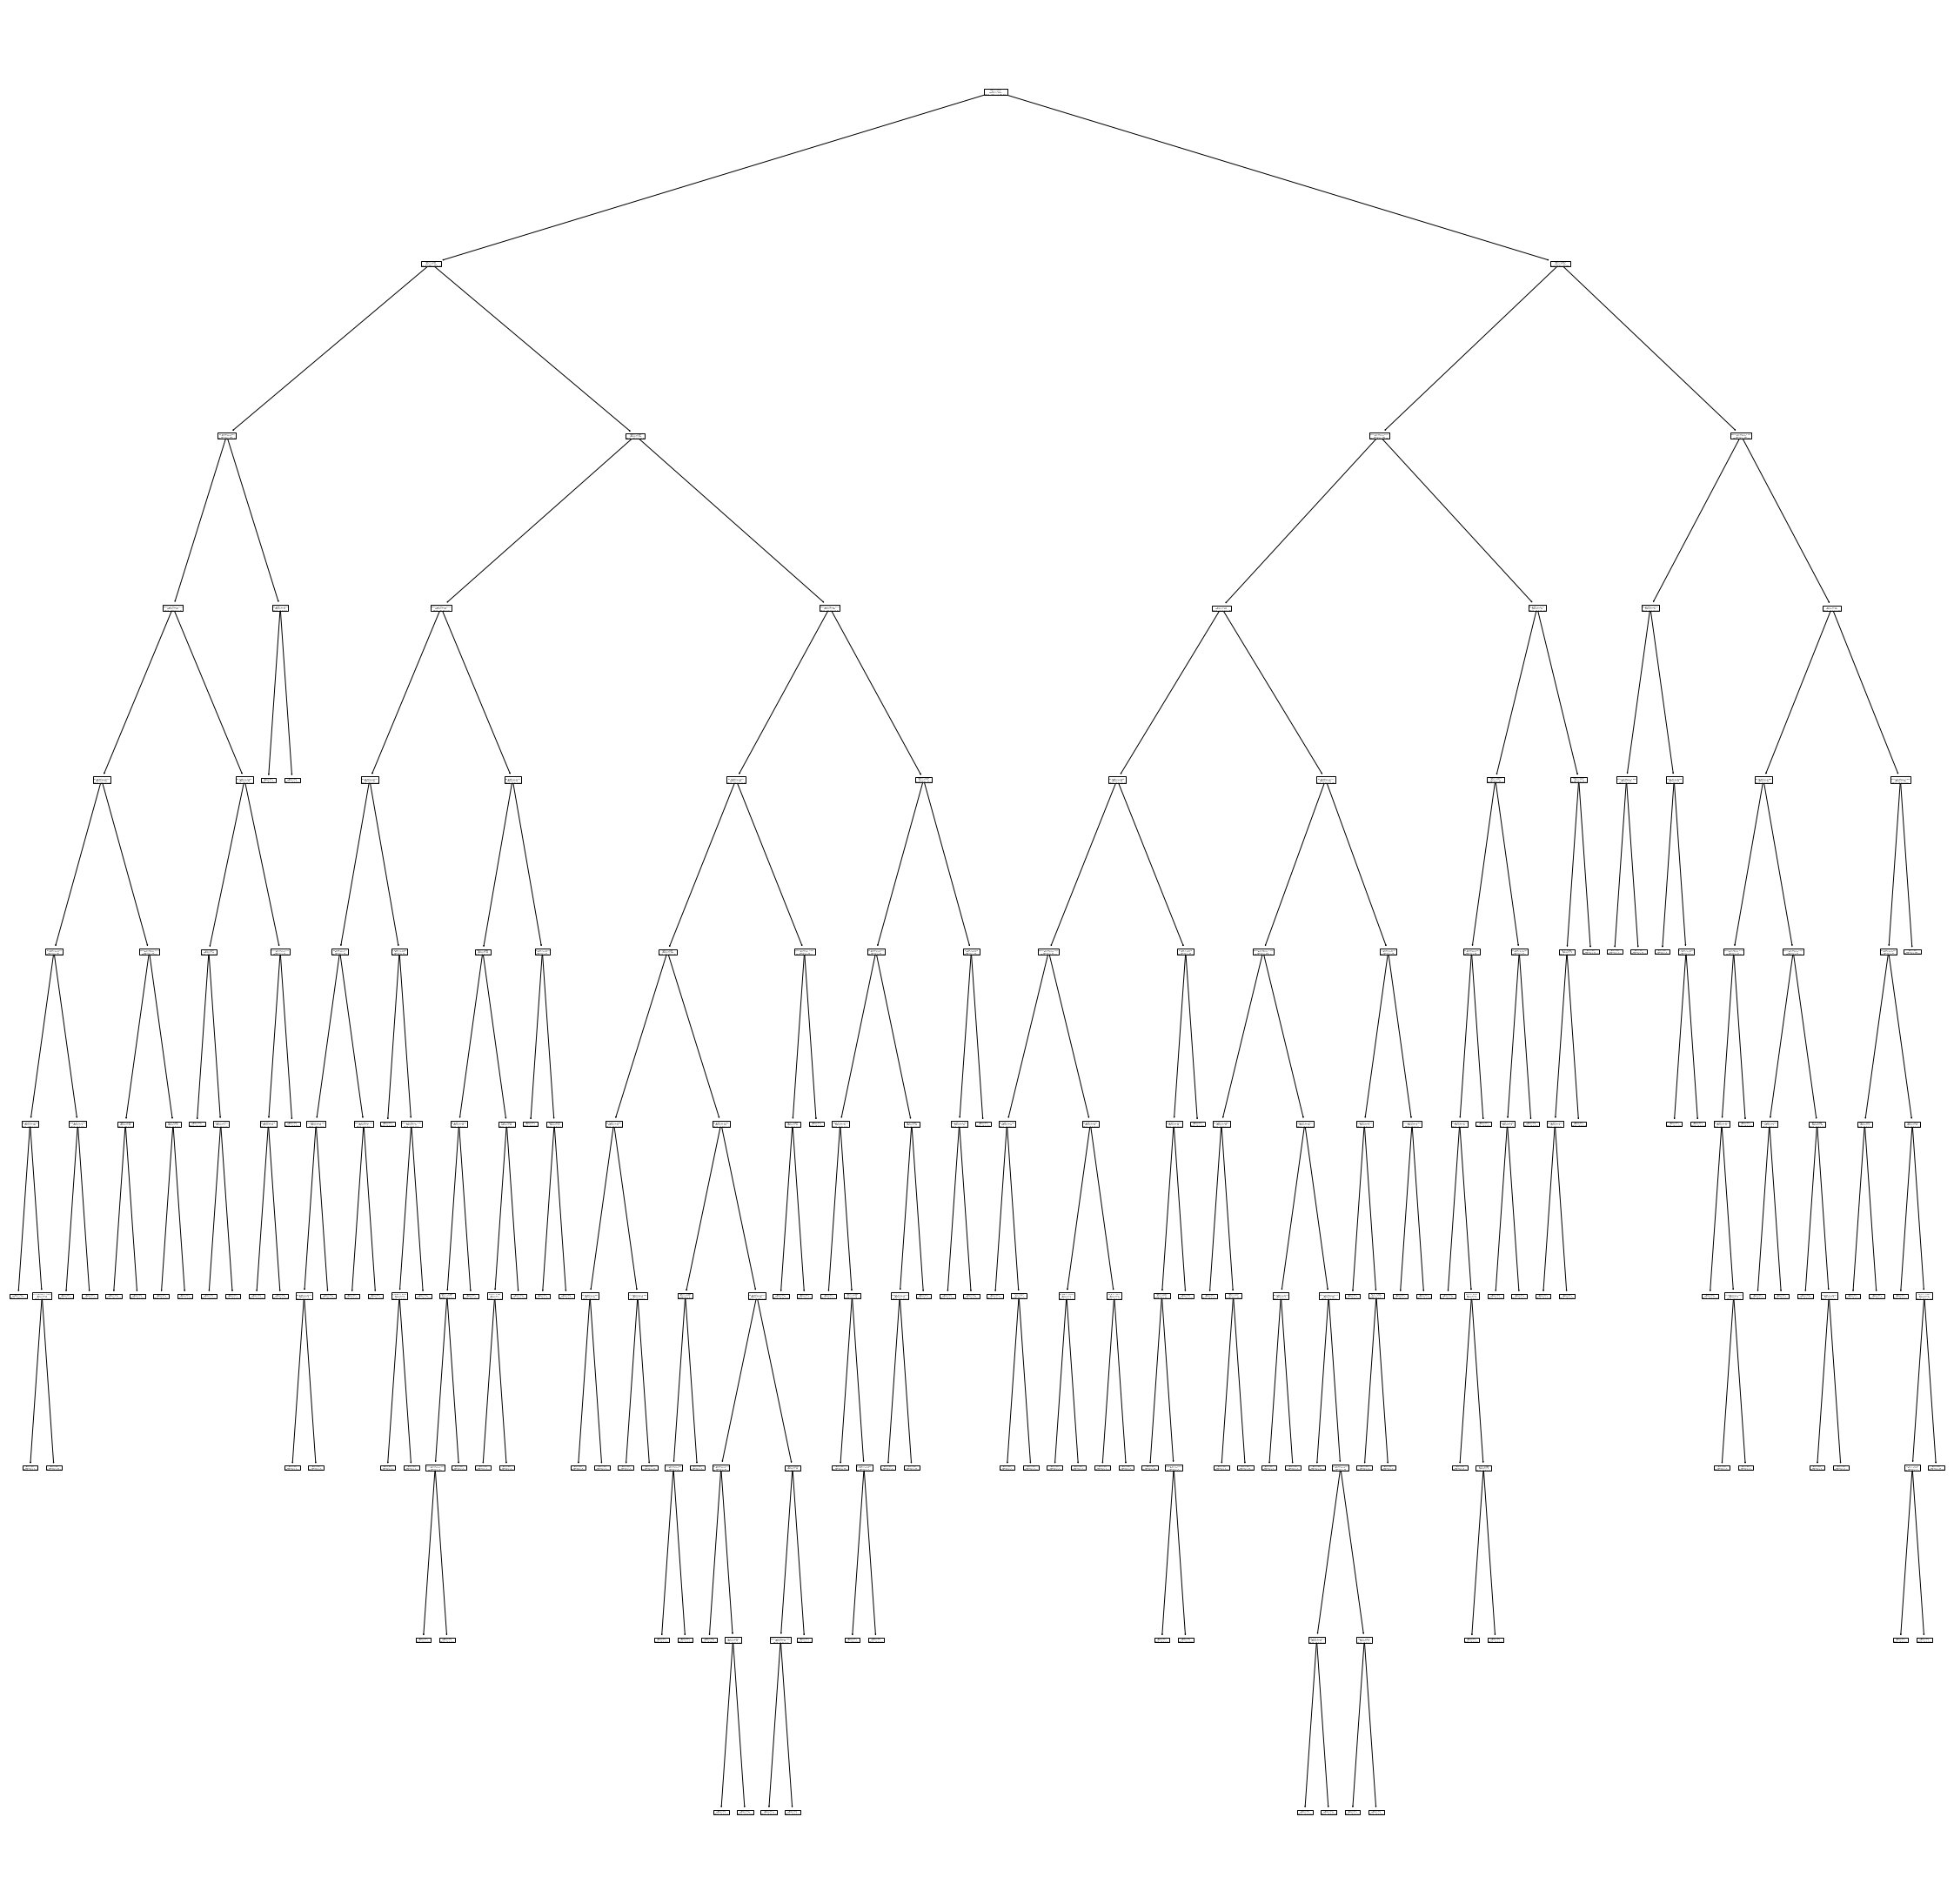

In [39]:
plt.figure(figsize = (40,40))
plot_tree(TreeModel['Tree'] ,  feature_names = Data.drop(columns = ['price_range']).columns )
plt.show()

In [40]:
print('Data Evaluation on Validation set is : ' , f1_score(y_val , TreeModel.predict(X_val) , average = 'micro'))

Data Evaluation on Validation set is :  0.8303030303030303


## 12. Tree Different Parameters

**Decision Tree Generator and Evaluator**

In [41]:
def Treefit(X,Y,parameters):
  Kfold = KFold(n_splits = 10)
  X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.33)
  TreeModel = Pipeline([('Scaler' , Normalizer()),
                        ('Tree', DTC())])
  DTC.set_parameter = parameters  
  Acc_test = []

  F1_test = []

  for idx_train , idx_test in Kfold.split(X_train):
    TreeModel = TreeModel.fit(X_train[idx_train] , y_train[idx_train])
    y_pred_test = TreeModel.predict(X_train[idx_test])
    Acc_test.append(accuracy_score(y_train[idx_test], y_pred_test))
    F1_test.append(f1_score(y_train[idx_test], y_pred_test , average = 'micro'))

  return np.mean(Acc_test) , np.mean(F1_test)

**Tree with different parameters**

In [42]:
X = Data.drop(columns = ['price_range']).values
Y = Data['price_range'].values
parameter = {'max_depth' : 1000 , 'criterion' : 'entropy'}
acc , f1 = Treefit(X,Y,parameter)
print(f'Accurracy is {round(acc,2)} and f1-score is {round(f1,2)}')
parameter = {'max_depth' : 2000 , 'criterion' : 'log_loss'}
acc , f1 = Treefit(X,Y,parameter)
print(f'Accurracy is {round(acc,2)} and f1-score is {round(f1,2)}')


Accurracy is 0.86 and f1-score is 0.86
Accurracy is 0.87 and f1-score is 0.87


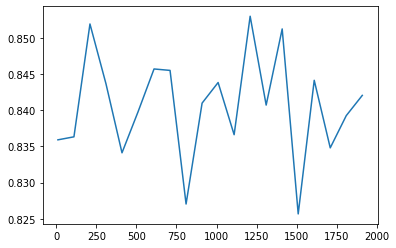

In [43]:
max_depth = np.arange(10,2000,100)
F1 = []
for m in max_depth:
  model = DTC(max_depth= m)
  model.fit(X_train , y_train)
  y_pred = model.predict(X_val)
  F1.append(f1_score(y_val ,y_pred , average= 'macro'))

plt.plot(max_depth , F1)  

## __Task2__

##Downloading Dataset  

In [44]:
! kaggle datasets download corrieaar/apartment-rental-offers-in-germany

 98% 91.0M/93.0M [00:00<00:00, 129MB/s]
100% 93.0M/93.0M [00:01<00:00, 95.1MB/s]


In [45]:
! unzip apartment-rental-offers-in-germany.zip

Archive:  apartment-rental-offers-in-germany.zip
  inflating: immo_data.csv           


## Importing Dataset

In [46]:
data = pd.read_csv('immo_data.csv')
data.head(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [48]:
data.fillna(method = 'pad' , inplace = True)
data.head(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,2019.0,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,10.0,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",87.23,NaN,2019.0,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,ONE_YEAR_FREE,10.0,False,True,19,2.46,40.0,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,87.23,NaN,2019.0,NaN,NaN,Feb20


In [49]:
data.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,268850.000000,268848.0,268850.000000,268850.000000,268850.000000,2.688500e+05,268850.000000,2.688500e+05,268850.000000,268850.000000,...,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268847.000000,268849.000000,268835.000000,268835.000000
mean,151.177297,10.0,9.791958,3.388925,28.795297,9.006164e+02,1966.316563,1.069697e+08,1.326509,3.710857,...,2.641261,114.723221,2.120543,3.557121,2.571542,3.070790,77.474451,2013.926245,89.170300,0.199722
std,304.624302,0.0,6.408399,1.964968,16.337999,3.084487e+04,47.312494,1.250093e+07,6.194966,2.735426,...,2.633440,61.517946,3.366351,5.497479,0.937594,1.407127,168.783816,10.778778,5.310542,0.009595
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.694200e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,53.690000,2013.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.840750e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.045000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


## 1. Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import OneHotEncoder , normalize

Features = ['heatingType','telekomUploadSpeed']
x = data['telekomUploadSpeed'].values
x = np.c_[x,(OneHotEncoder().fit_transform(data['heatingType'].values.reshape(-1,1)).toarray())]
y = data['serviceCharge'].values
x_train , x_test , y_train , y_test = train_test_split(x,y)


In [51]:
X = x_train.copy()
Y = y_train.copy()

**With Sklearn**

In [ ]:
model = LR()
model.fit(x_train , y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print('MSE score of model for training set is: ' , mean_squared_error(y_train , y_train_pred))
print('R2 score of model for training set is: ' , r2_score(y_train , y_train_pred))
print('MSE score of model for test set is: ' , mean_squared_error(y_test , y_test_pred))
print('R2 score of model for training set is: ' , r2_score(y_test , y_test_pred))

MSE score of model for training set is:  120668.72823993891
R2 score of model for training set is:  0.0025146728521822093
MSE score of model for test set is:  7946.927695415504
R2 score of model for training set is:  0.03831775297173834


**Lasso Model**

In [ ]:
from sklearn.linear_model import Lasso  
LassoModel = Lasso()
LassoModel.fit(x_train , y_train)
y_train_pred = LassoModel.predict(x_train)
y_test_pred = LassoModel.predict(x_test)
print('MSE score of LassoModel for training set is: ' , mean_squared_error(y_train , y_train_pred))
print('R2 score of LassoModel for training set is: ' , r2_score(y_train , y_train_pred))
print('MSE score of LassoModel for test set is: ' , mean_squared_error(y_test , y_test_pred))
print('R2 score of LassoModel for training set is: ' , r2_score(y_test , y_test_pred))

MSE score of LassoModel for training set is:  120742.77032565662
R2 score of LassoModel for training set is:  0.0019026178883809752
MSE score of LassoModel for test set is:  8031.47499070223
R2 score of LassoModel for training set is:  0.028086423830741225
